### Homework 4 Solutions

The made-up data file (attached in Blackboard and URL below) contains the top 10 results from an imaginary winter sport that involves both time and points.  There should be only one result for each of the top 10 places.

URL: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/HW4_sp2022_made_up_data.txt](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/HW4_sp2022_made_up_data.txt) 

There are no interpretive questions for the homework because it is made-up data.

### Question 1
Read the data file into a DataFrame with the columns `place`, `country`, `time` (instead of `time in seconds`), and `points`.  Missing data, which is indicated by -- (two dashes), should be represented by NaN.

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
%matplotlib inline

In [63]:
data = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/HW4_sp2022_made_up_data.txt", skiprows=2,na_values="--", sep=";")

In [64]:
# Change time in seconds to seconds
data['time in seconds'] = data['time in seconds'].str.replace("s","").astype(float)

# Change column names
data.columns = ['place', 'country', 'time', 'points']

In [65]:
data.head()

,place,country,time,points
0,1,nor,56.4,240pts
1,2,sweden,57.1,220pts
2,3,swe,57.2,220pts
3,3,swe,57.2,220pts
4,4,usa,58.9,210pts


### Question 2

Plot a bar chart of how many athletes from each country appeared in the top 10.  If you have not already, you should remove any duplicate rows.  Additionally, some country names are shortened or represented two different ways (ex. can for Canada, nor for Norway, swe for Sweden).

In [66]:
# Remove duplicate data
data = data.drop_duplicates()

In [67]:
# Map country names
data_map = {"sweden":"sweden", "nor":"norway", "swe":"sweden", "usa":"united states", "can":"canada", "canada":"canada", "uzbekistan":"uzbekistan", "united states":"united states", "japan":"japan"}
data["country"] = data["country"].map(data_map)

In [69]:
data.head()

,place,country,time,points
0,1,norway,56.4,240pts
1,2,sweden,57.1,220pts
2,3,sweden,57.2,220pts
4,4,united states,58.9,210pts
5,5,canada,58.6,NaN


Text(0.5, 1.0, 'Breakdown of top 10 placements by country')

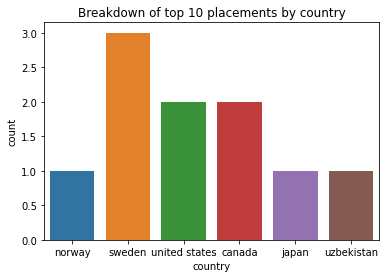

In [81]:
ax = sns.countplot(x="country",data=data)
plt.title("Breakdown of top 10 placements by country")

### Question 3
Create a histogram of the top 10 times.

Text(0.5, 1.0, 'Breakdown on the top 10 times')

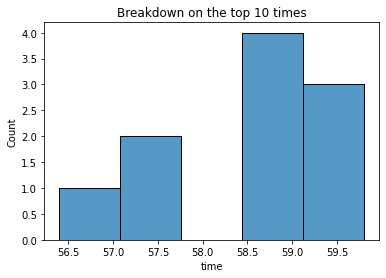

In [85]:
ax = sns.histplot(x="time",data=data)
plt.title("Breakdown on the top 10 times")

### Question 4: 
Compute the median number of points.  Missing data will automatically be ignored by the Pandas library when computing the median, which is fine.  However, you may need to covert the type of column to float instead of int to accomodate the NaN.

In [87]:
# Convert column to float
data['points'] = data['points'].str.replace("pts","").astype(float)

In [91]:
print(f"The mean number of points is: {round(data.points.median(), 2)}.")

The mean number of points is: 200.0.
